# Feature importance

In [3]:
import pandas as pd
from pycaret.regression import RegressionExperiment

In [5]:
selected_coins = [
    'BTCUSDT', 'BNBUSDT', 'ETHUSDT', 'LTCUSDT'
]

In [6]:
def add_features(df):
    """Add technical indicators and features to the dataframe"""
    # Create a copy of the dataframe
    data = df.copy()

    # Add lagged features
    for lag in [1, 3, 5, 7, 14, 30]:
        data[f'close_lag_{lag}'] = data['close'].shift(lag)

    # Add rolling stats
    data['ma7'] = data['close'].rolling(window=7).mean()
    data['ma30'] = data['close'].rolling(window=30).mean()
    data['std7'] = data['close'].rolling(window=7).std()

    # Add price changes
    data['price_change_1d'] = data['close'].pct_change(1)
    data['price_change_7d'] = data['close'].pct_change(7)

    # Calculate RSI (14-period)
    delta = data['close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    data['rsi'] = 100 - (100 / (1 + rs))

    # Drop rows with NaN values
    data = data.dropna()

    return data

,Description,Value
0,Session id,2011
1,Target,close
2,Target type,Regression
3,Original data shape,"(1795, 18)"
4,Transformed data shape,"(1795, 13)"
5,Transformed train set shape,"(1777, 13)"
6,Transformed test set shape,"(18, 13)"
7,Ignore features,5
8,Numeric features,12
9,Preprocess,True


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3644.3814,21878435.4820,4677.4390,0.7648,0.0923,0.0734
1,1929.6095,7109237.2941,2666.3153,0.9243,0.1119,0.0847
2,671.4239,733625.3752,856.5193,0.9696,0.0427,0.0319
3,1220.0831,4854405.5779,2203.2716,0.9804,0.0337,0.0202
4,12262.0716,317873001.8431,17828.9933,-0.1511,0.2162,0.1297
Mean,3945.5139,70489741.1145,5646.5077,0.6976,0.0994,0.0680
Std,4277.0860,123897165.3772,6213.4284,0.4313,0.0654,0.0392



--- BTCUSDT --- 


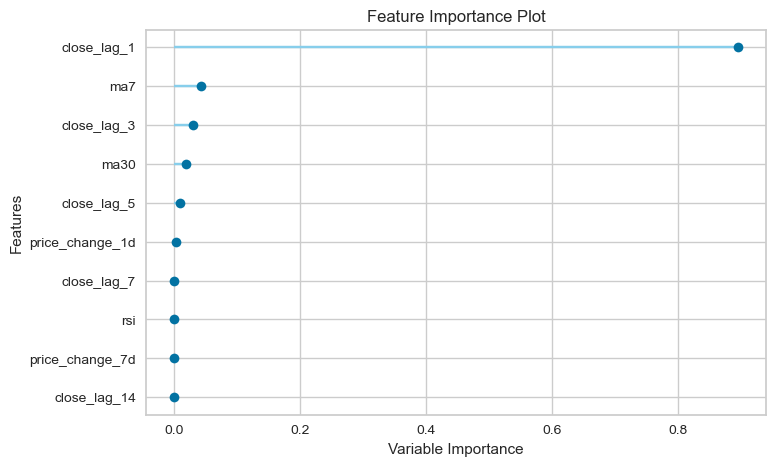

,Description,Value
0,Session id,5864
1,Target,close
2,Target type,Regression
3,Original data shape,"(1795, 18)"
4,Transformed data shape,"(1795, 13)"
5,Transformed train set shape,"(1777, 13)"
6,Transformed test set shape,"(18, 13)"
7,Ignore features,5
8,Numeric features,12
9,Preprocess,True


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,173.8672,43405.7022,208.3404,-2.1675,0.5339,0.3498
1,11.7870,271.2854,16.4707,0.9492,0.0604,0.0415
2,2.8920,17.4133,4.1729,0.9849,0.0148,0.0102
3,6.2328,111.4745,10.5581,0.9955,0.0275,0.0183
4,16.0733,747.3636,27.3380,0.8029,0.0409,0.0240
Mean,42.1704,8910.6478,53.3760,0.3130,0.1355,0.0888
Std,66.0039,17249.3573,77.8566,1.2422,0.1998,0.1309



--- BNBUSDT --- 


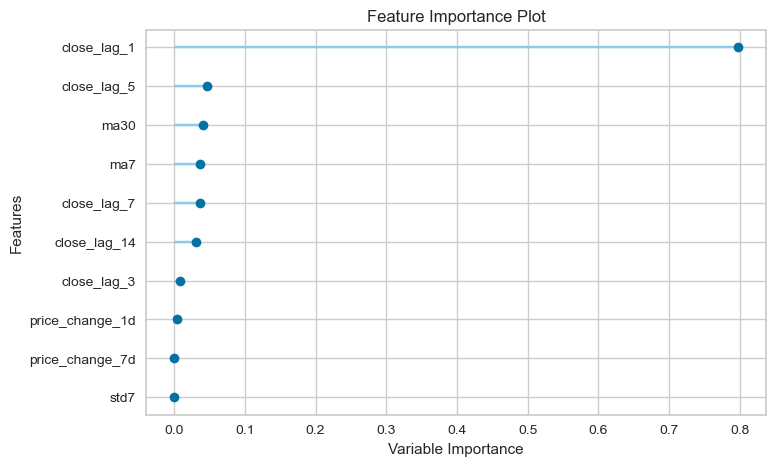

,Description,Value
0,Session id,5823
1,Target,close
2,Target type,Regression
3,Original data shape,"(1795, 18)"
4,Transformed data shape,"(1795, 13)"
5,Transformed train set shape,"(1777, 13)"
6,Transformed test set shape,"(18, 13)"
7,Ignore features,5
8,Numeric features,12
9,Preprocess,True


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1232.4914,2246989.8939,1498.9963,-1.9059,0.5435,0.3470
1,72.1457,8582.5656,92.6421,0.9852,0.0608,0.0439
2,17.3490,618.5734,24.8711,0.9905,0.0176,0.0113
3,24.1598,1883.0472,43.3941,0.9967,0.0144,0.0088
4,26.8483,1380.7368,37.1583,0.9952,0.0129,0.0093
Mean,274.5988,451890.9634,339.4124,0.4123,0.1298,0.0841
Std,479.3376,897553.9945,580.2501,1.1591,0.2076,0.1321



--- ETHUSDT --- 


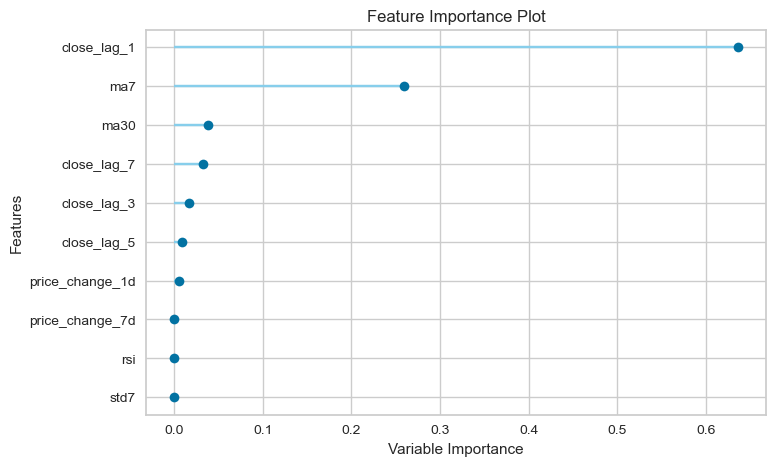

,Description,Value
0,Session id,8001
1,Target,close
2,Target type,Regression
3,Original data shape,"(1795, 18)"
4,Transformed data shape,"(1795, 13)"
5,Transformed train set shape,"(1777, 13)"
6,Transformed test set shape,"(18, 13)"
7,Ignore features,5
8,Numeric features,12
9,Preprocess,True


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17.1499,1145.5120,33.8454,0.5540,0.1336,0.0713
1,4.4106,42.4383,6.5145,0.9551,0.0763,0.0562
2,1.7592,6.3247,2.5149,0.9545,0.0299,0.0212
3,0.6952,1.3907,1.1793,0.9870,0.0136,0.0090
4,1.0527,3.8982,1.9744,0.9924,0.0181,0.0109
Mean,5.0135,239.9128,9.2057,0.8886,0.0543,0.0337
Std,6.2062,453.0486,12.4566,0.1680,0.0455,0.0253



--- LTCUSDT --- 


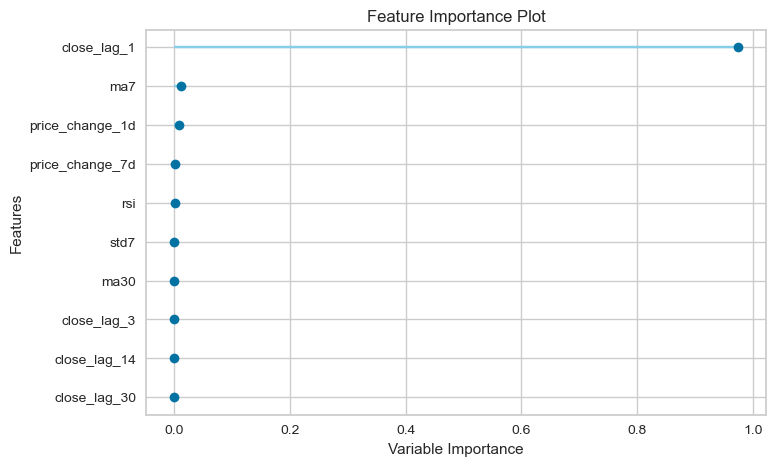

In [11]:
# Feature importance
for coin in selected_coins:
    df_filename = coin.lower() + "_1d.csv"
    df = pd.read_csv("../backend/data/"+df_filename, parse_dates=True, index_col=0)
    df = add_features(df)
    fi_exp = RegressionExperiment().setup(df, target = 'close', ignore_features = ['symbol','open','high','low','volume'],
                                          data_split_shuffle=False,
                                          fold=5, fold_strategy='timeseries', train_size=0.99)
    rf = fi_exp.create_model('rf')
    final_rf = fi_exp.finalize_model(rf)
    print(f"\n--- {coin} --- ")
    fi_exp.plot_model(final_rf, plot='feature')

## observations

For the representative coins, the following features are of significant importance:

- lag 1, 3, 5
- 7 day and 30 day moving average